# Foundations for Inference - Confidence Intervals

<img src="images/Ames2.jpg"/>

If you have access to data on an entire population, say the size of every house in Ames, Iowa, it's straight forward to answer questions like, "How big is the typical house in Ames?" and "How much variation is there in sizes of houses?". If you have access to only a sample of the population, as is often the case, the task becomes more complicated. What is your best guess for the typical size if you only know the sizes of several dozen houses? This sort of situation requires that you use your sample to make inference on what your population looks like.

We will take some random samples and calculate confidence based on these samples in this lab, which means you should set a seed on top of your lab. If  this concept is new to you, review the previous lab and ask your TA.

Setting a seed will cause R to sample the same sample each time you knit your document. This will make sure your results don't change each time you knit, and it will also ensure reproducibility of your work (by setting the same seed it will be possible to reproduce your results). You can set a seed like this:

    set.seed(9102015)

The number above is completely arbitraty. If you need inspiration, you can use your ID, birthday, or just a random string of numbers. The important thing is that you use each seed only once. You only need to do this once in your R Markdown document,
but make sure it comes before sampling.

In [1]:
set.seed(9102015) 

### Libraries
In this lab we will explore the data using the `dplyr` package and visualize it using the `ggplot2` package for data visualization. The data can be found in the companion package for this course, `statsr`.

In [2]:
#install.packages("package")
library(statsr)
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




We consider real estate data from the city of Ames, Iowa. This is the same dataset used in the previous lab. The details of 
every real estate transaction in Ames is recorded by the City Assessor's office. Our particular focus for this lab will be all residential home sales 
in Ames between 2006 and 2010.  This collection represents our population of interest. In this lab we would like to learn about these home sales by taking 
smaller samples from the full population. Let's load the data.

### Load Data

In [3]:
data(ames)
head(ames)

Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,⋯,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,526301100,1656,215000,20,RL,141,31770,Pave,NA,⋯,0,0,NA,NA,NA,0,5,2010,WD,Normal
2,526350040,896,105000,20,RH,80,11622,Pave,NA,⋯,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
3,526351010,1329,172000,20,RL,81,14267,Pave,NA,⋯,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
4,526353030,2110,244000,20,RL,93,11160,Pave,NA,⋯,0,0,NA,NA,NA,0,4,2010,WD,Normal
5,527105010,1629,189900,60,RL,74,13830,Pave,NA,⋯,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
6,527105030,1604,195500,60,RL,78,9978,Pave,NA,⋯,0,0,NA,NA,NA,0,6,2010,WD,Normal


In this lab we'll start with a simple random sample of size 60 from the population. Specifically, this is a simple random sample of size 60. Note that the data set has information on many housing variables, but for the first portion of the lab we'll focus on the size of the house, represented by the variable `area`.

In [4]:
n <- 60

samp <- sample_n(ames, n)

Describe the distribution of homes in your sample. What would you say is the "typical" size within your sample? Also state precisely what you interpreted "typical" to mean.

In [5]:
ames %>% summarise(mean_sm = mean(area), median_sm = median(area))

mean_sm,median_sm
<dbl>,<dbl>
1499.69,1442


In [6]:
# Fast Check
summary(ames$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334    1126    1442    1500    1743    5642 

Alternative:

```R
mean_sm = mean(ames$area)
mean_sm

median_sm = median(ames$area)
median_sm
```

### Confidence intervals

Return for a moment to the question that first motivated this lab: based on this sample, what can we infer about the population? Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as $\bar{x}$ (here we're calling it `x_bar`). That serves as a good **point estimate** but it would be useful to also communicate how uncertain we are of that estimate. This uncertainty can be quantified using a **confidence interval**.

You should by now be comfortable with calculating the mean and standard deviation of a sample in R. And we know that the sample size is 60. So the only remaining building block is finding the appropriate critical value for a given confidence level. We can
use the `qnorm` function for this task, which will give the critical value associated with a given percentile under the normal distribution. Remember that confidence levels and percentiles are not equivalent. For example, a 95% confidence level refers to the middle 95% of the distribution, and the critical value associated with this area will correspond to the 97.5th percentile.

Online check: https://gallery.shinyapps.io/dist_calc/

We can find the critical value for a 95% confidence interal using:

In [7]:
z_star_95 <- qnorm(0.975)
z_star_95

[1] 1.959964

which is roughly equal to the value critical value 1.96 that you're likely familiar with by now.

Let's finally calculate the confidence interval:

In [8]:
samp %>%
  summarise(lower = mean(area) - z_star_95 * (sd(area) / sqrt(n)),
            upper = mean(area) + z_star_95 * (sd(area) / sqrt(n)))

lower,upper
<dbl>,<dbl>
1359.176,1593.39


Alternative:
```R
lower = mean(samp$area) - z_star_95 * (sd(samp$area) / sqrt(n))
lower

upper = mean(samp$area) + z_star_95 * (sd(samp$area) / sqrt(n))
upper
```

To recap: even though we don't know what the full population looks like, we're 95% confident that the true average size of houses in Ames lies between the values *lower* and *upper*. There are a few conditions that must be met for this interval to be valid.

In this case we have the rare luxury of knowing the true population mean since we have data on the entire population. Let's calculate this value so that we can determine if our confidence intervals actually capture it. We'll store it in a data frame called `params` (short for population parameters), and name it `mu`.

In [9]:
params <- ames %>%
  summarise(mu = mean(area))

Using R, we're going to collect many samples to learn more about how sample means and confidence intervals vary from one sample to another.

Here is the rough outline:

    Obtain a random sample.

    Calculate the sample's mean and standard deviation, and use these to calculate and store the lower and upper bounds of the confidence intervals.

    Repeat these steps 50 times.

We can accomplish this using the `rep_sample_n` function. The following lines of code takes 50 random samples of size `n` from population (and remember we defined n = 60 earlier), and computes the upper and lower bounds of the confidence intervals based on these samples.

In [10]:
ci <- ames %>%
        rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
        summarise(lower = mean(area) - z_star_95 * (sd(area) / sqrt(n)),
                  upper = mean(area) + z_star_95 * (sd(area) / sqrt(n)))

`summarise()` ungrouping output (override with `.groups` argument)



Let's view the first five intervals:

In [11]:
ci %>%
  slice(1:5)

replicate,lower,upper
<int>,<dbl>,<dbl>
1,1373.361,1615.739
2,1342.188,1603.878
3,1339.810,1667.790
4,1448.084,1669.683
5,1465.170,1724.697


Next we'll create a plot. First step will be to create a new variable in the `ci` data frame that indicates whether the interval does or does not capture the true population mean. Note that capturing this value would mean the lower bound of the
confidence interval is below the value and upper bound of the confidence interval is above the value. Remember that we create new variables using the `mutate` function.

In [12]:
ci <- ci %>%
  mutate(capture_mu = ifelse(lower < params$mu & upper > params$mu, "yes", "no"))

The `ifelse` function is new. It takes three arguments: first is a logical statement, second is the value we want if the logical statement yields a true result, and the third is the value we want if the logical statement yields a false result.

We now have all the information we need to create the plot, but we need to re-organize our data a bit for easy plotting. Specifically, we need to organize the data in a new data frame where each row represents one bound, as opposed to one interval. So this

~~~
     lower    upper capture_mu
1 1350.540 1544.360        yes
2 1333.441 1584.425        yes
3 1412.133 1663.801        yes
...
~~~

Should instead look like

~~~
  ci_id ci_bounds capture_mu
1     1  1350.540        yes
2     2  1333.441        yes
3     3  1412.133        yes
4     1  1544.360        yes
5     2  1584.425        yes
6     3  1663.801        yes
...
~~~

We can accomplish this using the following:

In [13]:
ci_data <- data.frame(ci_id = c(1:50, 1:50),
                      ci_bounds = c(ci$lower, ci$upper),
                      capture_mu = c(ci$capture_mu, ci$capture_mu))

And finally we can create the plot using the following:

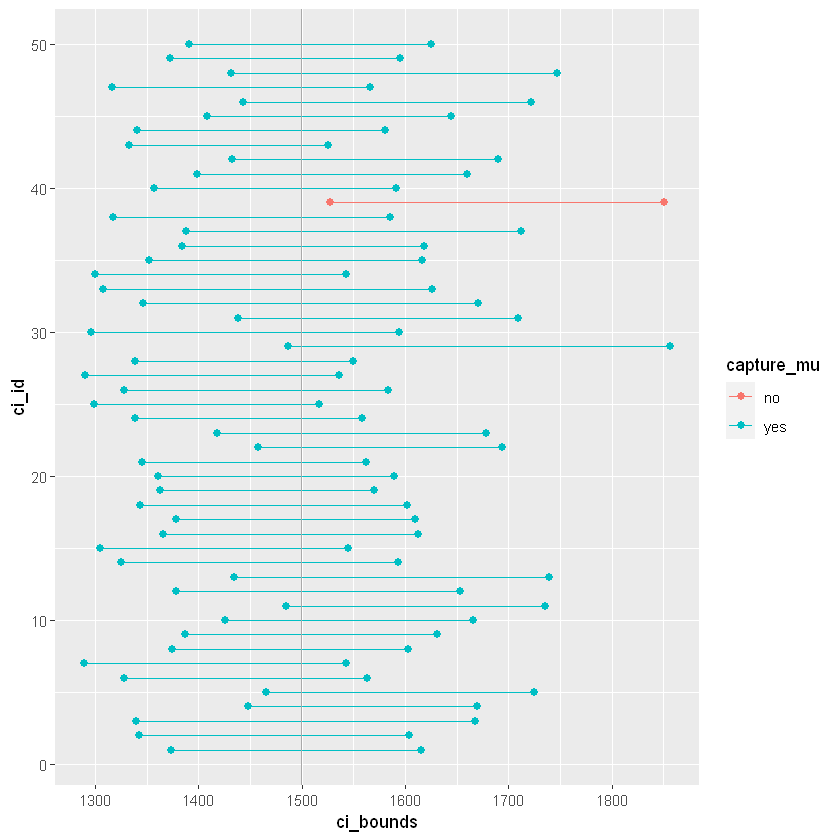

In [14]:
ggplot(data = ci_data, aes(x = ci_bounds, y = ci_id, 
                           group = ci_id, color = capture_mu)) +
  geom_point(size = 2) +  # add points at the ends, size = 2
  geom_line() +           # connect with lines
  geom_vline(xintercept = params$mu, color = "darkgray") # draw vertical line

What is the appropriate critical value for a 99% confidence level?

In [15]:
z_star_99 <- qnorm(0.99)
z_star_99

[1] 2.326348

Calculate 50 confidence intervals at the 99% confidence level. You do not need to obtain new samples, simply calculate new intervals based on the sample means and standard deviations you have already collected. Plot all intervals and calculate the proportion of intervals that include the true population mean.

`summarise()` ungrouping output (override with `.groups` argument)



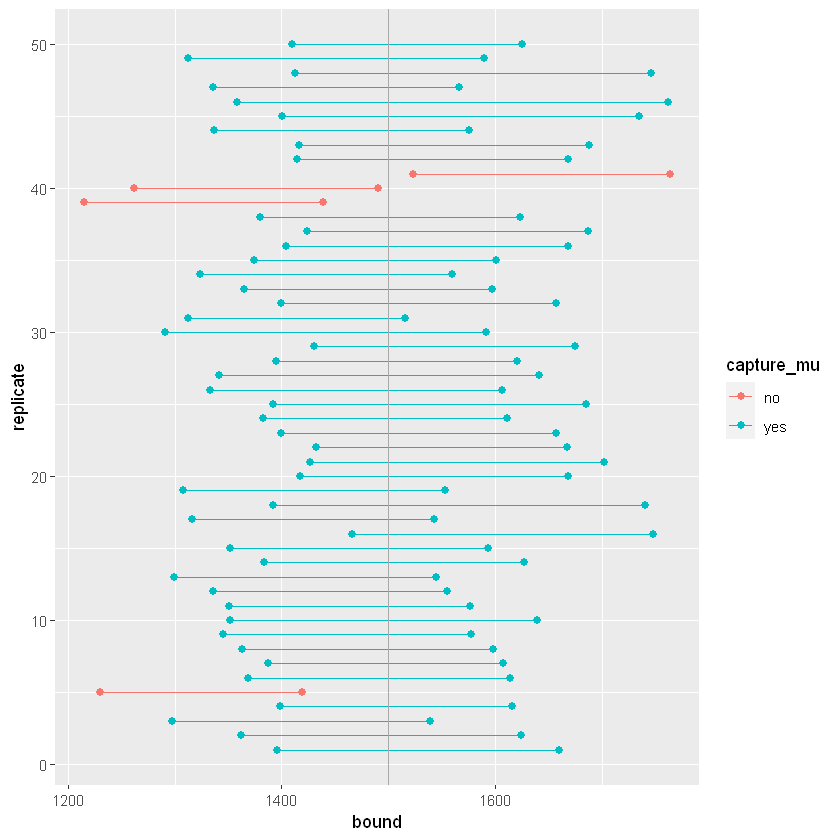

In [16]:
ci_99 <- ames %>%
        rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
        summarise(lower = mean(area) - z_star_95 * (sd(area) / sqrt(n)),
                  upper = mean(area) + z_star_95 * (sd(area) / sqrt(n)))
       

ci_99 <- ci_99 %>%
        mutate(capture_mu = ifelse(lower < params$mu & upper > params$mu, "yes", "no"))


ci_99_data <- gather(ci_99, type, bound, lower:upper)


ggplot(data = ci_99_data, aes(x = bound, y = replicate, group = replicate, color = capture_mu)) +
  geom_point(size = 2) +  # add points at the ends, size = 2
  geom_line() +           # connect with lines
  geom_vline(xintercept = params$mu, color = "darkgray") # draw vertical line